<a href="https://colab.research.google.com/github/lee-yeonseo/study-ml-dl-with-alone-book/blob/main/assignment_wk1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Q1. Linear Regression
우리는 학생들이 공부한 시간과 점수의 상관관계에 대해 분석해보고 싶다. 주석을 참고하여 다음 문제를 해결하시오.

In [2]:
# 1. 필요한 패키지와 데이터를 가져온다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 2. load 'student_scores.csv' dataset
dataset = pd.read_csv("/content/drive/MyDrive/student_scores.csv")
print(dataset.head())

# 3. 데이터를 x, y로 나누세요.
X_data = dataset.Hours.values
y_data = dataset.Scores.values

# 4. X_data와 y_data의 shape을 확인하라.
print(X_data.shape)
print(y_data.shape)

# 5. split data into train set & test set
# 조건 : train data의 비율이 80%가 될 수 있도록 지정하시오.
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

# 6. training set과 test set을 2차원 배열로 reshape 하시오.
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
(25,)
(25,)


In [3]:
# 7. define model
lr = LinearRegression()

# 8. fit the model
lr.fit(X_train, y_train)

print(lr.coef_, lr.intercept_)

[9.86187466] 3.323086128875424


Text(0, 0.5, 'y (scores)')

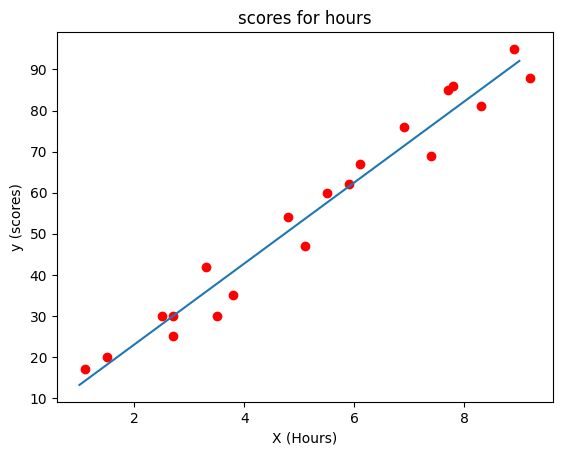

In [4]:
# 9. 시각화(matplotlib 완전 정복)
# wk3 압축 파일에 있는 'wk3_ss_q1_graph.png'을 참고하여 그래프를 그리시오
# Hint : plt 사용, function의 계수 사용, 구간 [1, 9]

import matplotlib.pyplot as plt
point = np.arange(1, 10)
plt.scatter(X_train, y_train, color='red')
plt.plot(point, lr.coef_*point + lr.intercept_)
plt.plot()
plt.title('scores for hours')
plt.xlabel('X (Hours)')
plt.ylabel('y (scores)')

# Q2. Polynomail Regression
우리는 다항 회귀에 대해 이해하고자 Housin_prices_data을 관찰하기로 했다. 다항회귀를 사용하여 아래 문제를 해결하라.

In [5]:
# model의 score 함수를 이용해 test 데이터에 대한 점수를 구하라.
print(lr.score(X_test, y_test))

0.8451638736935714


In [25]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset
data = pd.read_csv("/content/drive/MyDrive/Housing_Prices_data.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


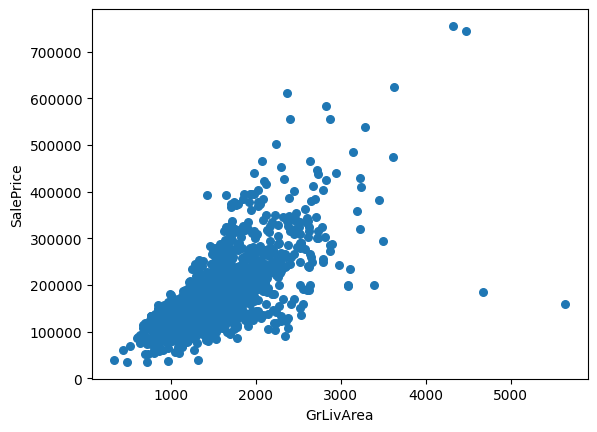

In [26]:
# 위 데이터가 어떻게 분포되어 있는지 확인해보자
# wk1의 seaborn 내용을 참고하자
# x는 GrLivArea, y는 SalePrice, size는 30으로 설정하여 구성하라

x = data.GrLivArea
y = data.SalePrice

import matplotlib.pyplot as plt
plt.scatter(x, y, s=30)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

In [28]:
# 전처리
# 필요한 열 선택
# 불러온 데이터에서 GrLivArea와 SalePrice만 선택하여 data에 저장하라
data = pd.DataFrame(data, columns=['GrLivArea', 'SalePrice'])

# 데이터 타입 변환 (문자열 -> 숫자)
data = data.apply(pd.to_numeric, errors='coerce')

# 결측치 처리
data = data.dropna()

# data를 x, y에 선언하자.
# 이때 feature들로는 bmi, charges만 이용한다고 하자.

X = data['GrLivArea']
Y = data['SalePrice']

# 1차원인 X를 numpy 배열의 2차원으로 reshape 해주자.
X = np.array(X).reshape(-1, 1)

In [43]:
from sklearn.preprocessing import PolynomialFeatures

# PolynomialFeatures를 이용하여 degree가 2인 feature들로 변환하자.
model = PolynomialFeatures(degree=2)
x_poly = model.fit_transform(X)

In [44]:
from sklearn.linear_model import LinearRegression
#define model
lr = LinearRegression()
lr.fit(x_poly, Y)

# 예측값 생성
X_test = np.linspace(X.min(), X.max(), 5000).reshape(-1, 1)
# 변환
graph_poly = model.transform(X_test)
result = lr.predict(graph_poly)

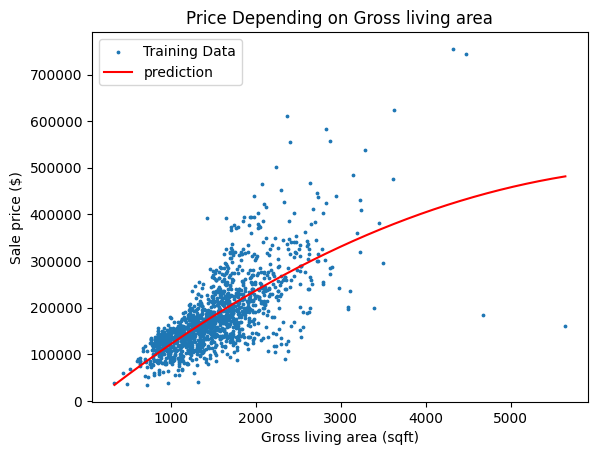

In [45]:
# 시각화
plt.scatter(X, Y, s=3, label='Training Data')
plt.plot(X_test, result, label='prediction', color='red')
plt.title('Price Depending on Gross living area')
plt.xlabel('Gross living area (sqft)')
plt.ylabel('Sale price ($)')
plt.legend()
plt.show()

In [46]:
# 성능 확인하기
train_r2 = lr.score(x_poly, Y)
print('train rw score:', train_r2)

train rw score: 0.508504842437747


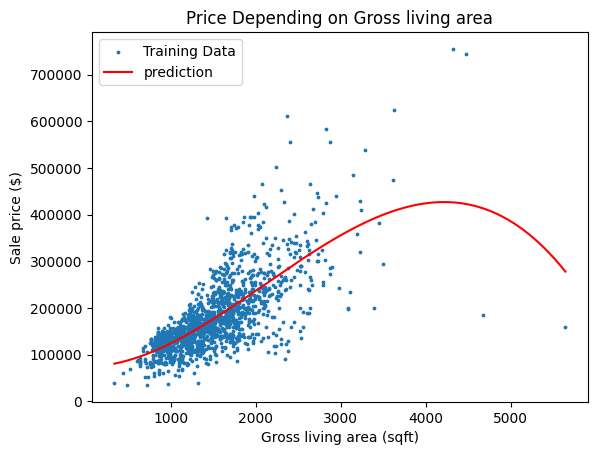

train r2 score: 0.520928204824646


In [48]:
#degree를 3으로 설정하고, 나머지는 동일하게 진행하자.
model = PolynomialFeatures(degree=3)
x_poly = model.fit_transform(X)

lr = LinearRegression()
lr.fit(x_poly, Y)

# 예측값 생성
X_test = np.linspace(X.min(), X.max(), 5000).reshape(-1, 1)
graph_poly = model.transform(X_test)
result = lr.predict(graph_poly)

plt.scatter(X, Y, s=3, label="Training Data")
plt.plot(X_test, result, label="prediction", color="red")
plt.title("Price Depending on Gross living area")
plt.xlabel('Gross living area (sqft)')
plt.ylabel('Sale price ($)')
plt.legend()
plt.show()

# 성능 확인
print('train r2 score:', lr.score(x_poly, Y))

각 회귀의 R2 값이 왜 이렇게 나왔는지 생각해보자.

In [51]:
# 회귀를 통해 얻은 모델을 사용하여, GrLivArea의 값이 1722 sqft인 주택의 가격을 예측하라.

# X_test 데이터에 대한 다항 특성 변환
X_test_poly = model.transform([[1722]])

# 모델을 사용하여 X_test_poly에 대한 예측값 생성
predictions = lr.predict(X_test_poly)

# 예측 결과 출력
print(f"Predictions form X_test: $ {predictions}")

Predictions form X_test: $ [202676.63120802]


# Q3. Polynomial Regression2
**규제 적용하기**<br>
Q2에서는 규제가 없고, feature가 2개였다. 이번에는 규제를 적용하고, 사용하는 특성을 늘려 다중 회귀를 구현해보자.

In [52]:
#import required packages
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Housing_Prices_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [53]:
# 집값을 측정하는데 영향을 미치는 변수들은 많지만, 여기서는 6개의 변수만 사용하도록 하자
linear_cols = ['OverallQual', 'TotalBsmtSF', 'FullBath', '2ndFlrSF', 'GrLivArea', 'TotRmsAbvGrd']
df = df[linear_cols + ['SalePrice']]
df.head()

,OverallQual,TotalBsmtSF,FullBath,2ndFlrSF,GrLivArea,TotRmsAbvGrd,SalePrice
0,7,856,2,854,1710,8,208500
1,6,1262,2,0,1262,6,181500
2,7,920,2,866,1786,6,223500
3,7,756,1,756,1717,7,140000
4,8,1145,2,1053,2198,9,250000


In [54]:
# 결측치 확인
print(df.isnull().sum())

OverallQual     0
TotalBsmtSF     0
FullBath        0
2ndFlrSF        0
GrLivArea       0
TotRmsAbvGrd    0
SalePrice       0
dtype: int64


In [55]:
# df의 마지막 열을 y(target)로 하고 나머지는 x(features)가 되도록 데이터를 분리해보자.
x = df[linear_cols]
y = df["SalePrice"]

In [56]:
# train, test로 분리해보자 (단, test_size는 -.2, random state은 156으로 되도록 설정)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=156)

In [57]:
from sklearn.linear_model import Ridge
# PolynomialFeatures를 사용하여 x_train과 x_test를 변환하자
# 단, degree는 3으로 설정하자
model = PolynomialFeatures(degree=3)
x_poly_train = model.fit_transform(x_train)
x_poly_test = model.fit_transform(x_test)

# from sklearn.linear_model import Ridge 릿지 규제를 사용해서 모델을 학습시켜보자
ridge = Ridge() # alpha의 값을 조정하며 성능을 확인해보자
ridge.fit(x_poly_train, y_train)

# 학습된 모델의 train, test score를 확인해보자
train_r3 = ridge.score(x_poly_train, y_train)
test_r3 = ridge.score(x_poly_test, y_test)
y_pred = ridge.predict(x_poly_test)

print(train_r3, test_r3)

0.8724350147821971 0.8426273196889544


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.22224e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


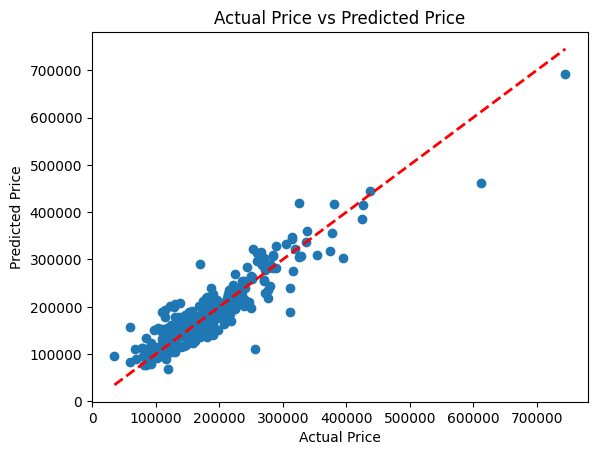

In [58]:
# 시각화
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.show()

**모델의 정확도 구하기**<br>
**HINT** :Scikit-learn의 metricsdpsms `accuracy_score()`이라는 function이 있습니다. 이외에도 `mean_squared_error()`를 통해 MSE를 구할 수 있습니다. 이에 대해 찾아보시고 사용해보세요.<br><br>
이때 pred에는 x_test에 대한 모델의 예측값이 들어가야 함.

In [61]:
# 모델의 정확도를 찾아보자.
# HINT : from sklearn.metrics import accuracy_score를 찾아보시고 사용해보세요.
from sklearn.metrics import mean_squared_error

# y_test: 실제 타겟값, y_pred: 모델의 예측값
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.2f}".format(mse))

Mean Squared Error: 1060269889.94


## Bonus

Prometheus 2022 basic study wk3 assignment Problem 2<br><br>

Scikit-learn의 datasets 서브 패키지에는 선형 회귀/로지스틱 회귀용 가상 데이터를 생성할 수 있는 명령어인 `make_regression()`, `make_classification()`이 있습니다. 다음 명령어를 활용해 선형 회귀를 구현하세요.

*1*. `make_regression()`을 활용해 선형 회귀용 가상 데이터를 생성하세요.

- sample은 5000개, feature variable은 2개로 지정하세요.
- y절편을 10 증가시키고, 전체적인 데이터의 variance를 10으로 지정하세요.

In [68]:
from sklearn.datasets import make_regression

x, y, c = make_regression(n_samples=5000, n_features=2, noise=10, bias=10, coef=True)

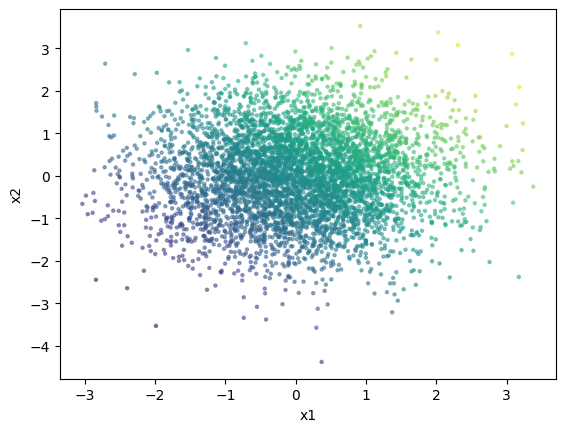

In [69]:
import matplotlib.pyplot as plt

plt.scatter(x[:,0], x[:,1], c=y, s=5, alpha=0.5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

2. 위의 데이터를 가지고 선형회귀를 구현해보세요.

- train data와 test data를 8:2 비율로 분할하세요.
- 예측 오차를 더 줄이기 위해 데이터 표준화를 진행하세요.

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

std_scale = StandardScaler()
std_scale.fit(x_train)

x_train_std = std_scale.transform(x_train)
x_test_std = std_scale.transform(x_test)

lr = LinearRegression()
lr.fit(x_train_std, y_train)

y_pred = lr.predict(x_test_std)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.2f}".format(mse))

Mean Squared Error: 106.58
